In [59]:
#Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statistics as stats

#read csv file and display first few rows

salary = "./ds_salaries.csv"
df=pd.read_csv(salary)
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [60]:
#find number or rows and columns in the dataframe

rows=len(df.axes[0])
columns=len(df.axes[1])
print(f"No. of rows in dataframe: {rows}\nNo. of columns in dataframe: {columns}")

#Dataset has 3755 rows and 11 columns

No. of rows in dataframe: 3755
No. of columns in dataframe: 11


In [61]:
#Checking any empty cells in the dataset

empty_values = df.isna().sum()
empty_values

#No empty values in any column

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [62]:
# Finding duplicate rows for all columns

duplicate_rows = df[df.duplicated()]
duplicate_rows

#Found total 1171 duplicate rows

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


In [63]:
# Remove duplicate rows

df_clean = df.drop_duplicates(keep="first", inplace=False)
df_clean

#After removing duplicate rows, we are left with 2584 rows dataframe

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [64]:
# Fnding different entries in each column

for column in df_clean.columns:
    entries = {column: df_clean[column].value_counts()} 

    print (f"\n{entries}")

          


{'work_year': 2023    1156
2022    1125
2021     228
2020      75
Name: work_year, dtype: int64}

{'experience_level': SE    1554
MI     664
EN     270
EX      96
Name: experience_level, dtype: int64}

{'employment_type': FT    2547
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64}

{'job_title': Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Compliance Data Analyst        1
Deep Learning Researcher       1
Staff Data Analyst             1
Data DevOps Engineer           1
Finance Data Analyst           1
Name: job_title, Length: 93, dtype: int64}

{'salary': 100000    70
120000    59
150000    58
200000    48
80000     46
          ..
126277     1
153088     1
323300     1
200160     1
412000     1
Name: salary, Length: 815, dtype: int64}

{'salary_currency': USD    2107
EUR     200
GBP     144
INR      59
CAD      2

In [65]:
#Descriptive Statistics for numerical columns 

describe_summary = df_clean.describe()
describe_summary

,work_year,salary,salary_in_usd,remote_ratio
count,2584.000000,2.584000e+03,2584.000000,2584.000000
mean,2022.301084,2.103653e+05,133409.280186,50.483746
std,0.749179,8.080375e+05,67136.837329,48.163707
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84975.000000,0.000000
50%,2022.000000,1.346300e+05,130000.000000,50.000000
75%,2023.000000,1.825625e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [66]:
#Distribution Analysis: Visualize the distribution of numeric variables like work_year, salary, salary_in_usd and remote_ratio.

#Categorical Analysis: Analyze the distribution of categorical variables like experience_level, employment_type, job_title, salary_currency, employe residence, company_location and company_size.

#Salary Analysis: Analyze how the salary varies with factors like experience level, company size, and employment type.

#Correlation Analysis: Will see if there's any correlation between the numeric variables.

In [67]:
#Creating dataframe for salary_currency column to show different currency distribution

different_currency = df_clean["salary_currency"].value_counts()
different_currency

USD    2107
EUR     200
GBP     144
INR      59
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: salary_currency, dtype: int64

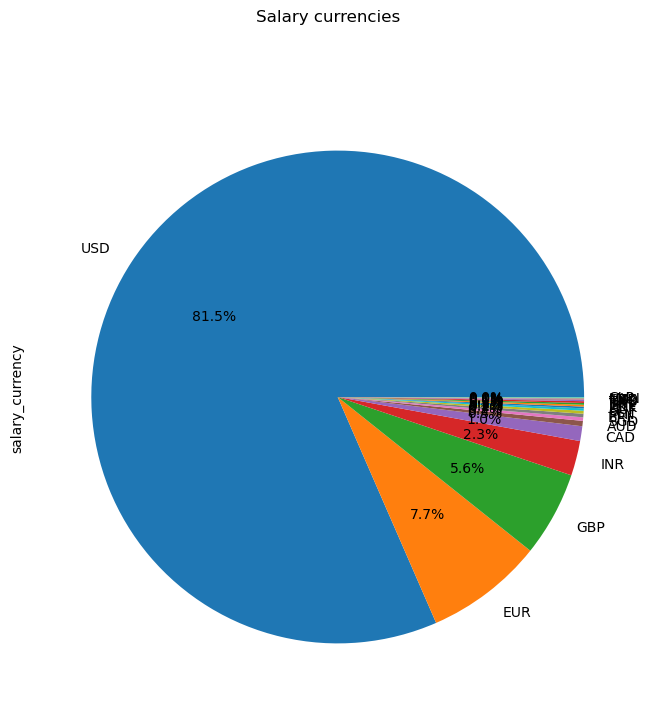

In [68]:
# Plotting the distribution of salary_currency

currencies_pie = different_currency.plot(kind="pie", subplots=True, figsize=(8,8), title="Salary currencies", autopct="%1.1f%%")
plt.show()                                

In [69]:
#Creating dataframe for remote_ratio column to show work mode

remote_work = df_clean["remote_ratio"].value_counts()
remote_work

100    1211
0      1186
50      187
Name: remote_ratio, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

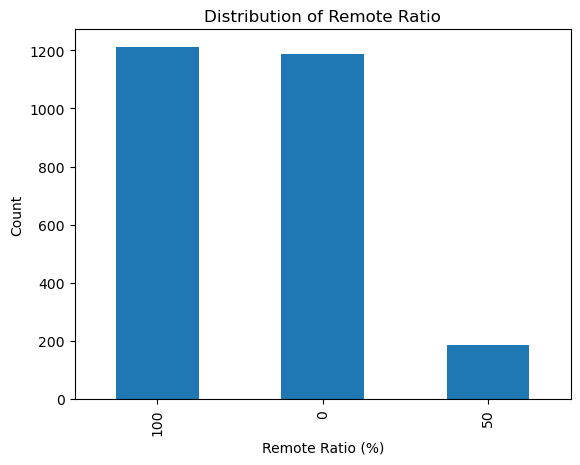

In [70]:
# Plotting the distribution of remote_ratio

remote_work.plot(kind="bar")
plt.title('Distribution of Remote Ratio')
plt.xlabel("Remote Ratio (%)")
plt.ylabel("Count")
plt.show

#A significant number of employees do not work remotely at all (0% remote ratio). 
#Another substantial group works fully remotely (100% remote ratio). 
#Only a small fraction of employees have a 50% remote work arrangement.

In [71]:
#Creating dataframe for company_size column to show size of the company

size_of_company = df_clean["company_size"].value_counts()
size_of_company

M    2028
L     409
S     147
Name: company_size, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

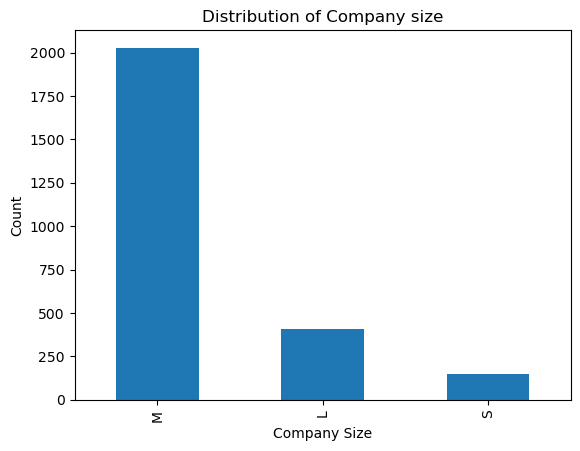

In [72]:
# Plotting the distribution of remote_ratio

size_of_company.plot(kind="bar")
plt.title('Distribution of Company size')
plt.xlabel("Company Size")
plt.ylabel("Count")
plt.show

#A significant number of individuals work in medium-sized companies, 
#followed by large and then small companies.

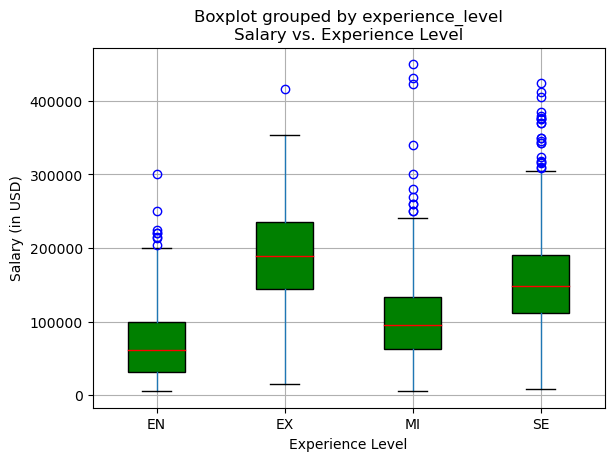

In [102]:
# Salary vs. Experience Level
a="blue"
b="red"
c="green"
df_clean.boxplot(column=["salary_in_usd"], by=["experience_level"], patch_artist=True, boxprops=dict(facecolor=c), flierprops=dict(color=a, markeredgecolor=a), medianprops=dict(color=b))
plt.title('Salary vs. Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (in USD)')
plt.show()

#There's a clear trend that as experience level increases, the median salary also increases. 
#The Executive-level (EX) experience has the highest median salary, followed by Entry-level(EN), Mid-level (MI), and Senior-level (SE). 
#The spread of salaries (as shown by the height of the boxes) also seems to increase with experience, indicating more variability in salaries for more experienced roles.

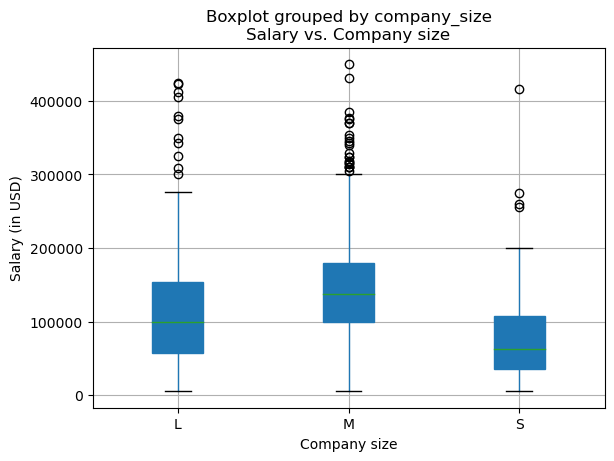

In [78]:
# Salary vs. Company_size

df_clean.boxplot(column=["salary_in_usd"], by=["company_size"], patch_artist=True)
plt.title('Salary vs. Company size')
plt.xlabel('Company size')
plt.ylabel('Salary (in USD)')
plt.show()


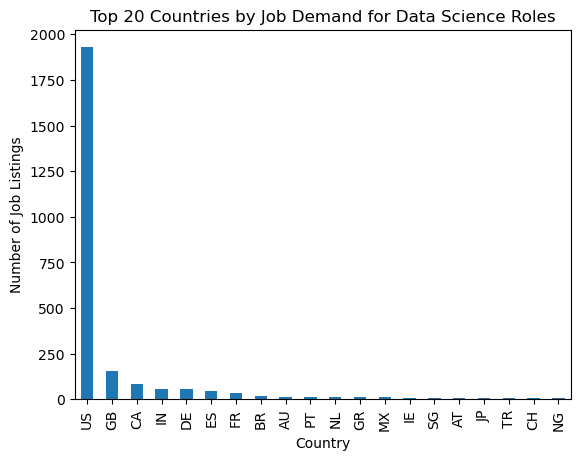

In [94]:
# number of job listings per country 

job_listing_per_country = df_clean["company_location"].value_counts()

# Plotting the job demand by country
job_listing_per_country.head(20).plot(kind ="bar")
plt.title('Top 20 Countries by Job Demand for Data Science Roles')
plt.ylabel('Number of Job Listings')
plt.xlabel('Country')
plt.show()